In [1]:
!pip3 install -r requirements.txt

In [2]:
import warnings

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [4]:
warnings.filterwarnings("ignore")

### Pre-processing for BLF Features

In [5]:
with open('./Features/blf_features.txt') as f:
    lines = f.readlines()

In [6]:
spectral = []
deltaspec = []
varspec = []
logfluc = []
corr = []
speccon = []
for line in lines:

    if line.startswith('SPECTRAL:'):
        spectral.append(list(map(float, line.replace(
            'SPECTRAL:', '').rstrip('\n').strip().split(' '))))
    if line.startswith('DELTASPECTRAL:'):
        deltaspec.append(list(map(float, line.replace(
            'DELTASPECTRAL:', '').rstrip('\n').strip().split(' '))))
    if line.startswith('VARIANCEDELTASPECTRAL:'):
        varspec.append(list(map(float, line.replace(
            'VARIANCEDELTASPECTRAL:', '').rstrip('\n').strip().split(' '))))
    if line.startswith('LOGARITHMICFLUCTUATION:'):
        logfluc.append(list(map(float, line.replace(
            'LOGARITHMICFLUCTUATION:', '').rstrip('\n').strip().split(' '))))
    if line.startswith('CORRELATION:'):
        corr.append(list(map(float, line.replace(
            'CORRELATION:', '').rstrip('\n').strip().split(' '))))
    if line.startswith('SPECTRALCONTRAST:'):
        speccon.append(list(map(float, line.replace(
            'SPECTRALCONTRAST:', '').rstrip('\n').strip().split(' '))))

In [7]:
df = pd.DataFrame(
    {'SPECTRAL': spectral,
     'DELTASPECTRAL': deltaspec,
     'VARIANCEDELTASPECTRAL': varspec,
     'LOGARITHMICFLUCTUATION': logfluc,
     'CORRELATION': corr,
     'SPECTRALCONTRAST': speccon
     })

In [8]:
df.head()

,SPECTRAL,DELTASPECTRAL,VARIANCEDELTASPECTRAL,LOGARITHMICFLUCTUATION,CORRELATION,SPECTRALCONTRAST
0,"[-0.0315295, -0.0255247, -0.0223557, -0.019199...","[0.000946698, 0.0019733, 0.00280769, 0.0037678...","[0.0023107, 0.00245491, 0.00256964, 0.00268689...","[17.2747, 27.0661, 40.696, 89.8944, 110.846, 8...","[0.00049472, 0.000352754, 0.000331897, 0.00032...","[0.019277, 0.0243692, 0.0271908, 0.0282635, 0...."
1,"[-0.0290814, -0.0236205, -0.0205705, -0.018726...","[0.00100166, 0.00169647, 0.00264387, 0.0035443...","[0.00239419, 0.00241911, 0.00243979, 0.0025311...","[13.1384, 20.8441, 27.6096, 35.502, 40.2289, 4...","[0.000270678, 0.000149724, 0.000109612, 8.0102...","[0.0254623, 0.0282966, 0.029933, 0.0317052, 0...."
2,"[-0.0293247, -0.0244724, -0.0211901, -0.018393...","[0.000684724, 0.00156535, 0.00267864, 0.003613...","[0.002159, 0.00222019, 0.00230413, 0.00237041,...","[19.5656, 27.7627, 29.6105, 34.1172, 39.3772, ...","[0.000357107, 0.000184863, 0.000118314, 0.0001...","[0.0258585, 0.0294637, 0.0312468, 0.0322719, 0..."
3,"[-0.030254, -0.0242809, -0.0209517, -0.0184083...","[0.000692874, 0.00176979, 0.00292655, 0.004073...","[0.00227422, 0.00232796, 0.00236614, 0.0024386...","[25.9055, 40.5907, 49.2968, 48.8784, 50.5929, ...","[0.000467102, 0.000386286, 0.000374436, 0.0003...","[0.024517, 0.0278683, 0.0300326, 0.0309299, 0...."
4,"[-0.0292564, -0.0239997, -0.0209238, -0.018810...","[0.000675877, 0.00162841, 0.0024357, 0.0035771...","[0.0022387, 0.00235265, 0.00248606, 0.00255088...","[16.9327, 21.6807, 36.7815, 43.1292, 46.9303, ...","[0.000389585, 0.000249075, 0.000209627, 0.0001...","[0.0270539, 0.030749, 0.0332027, 0.0347849, 0...."


## Median of BLF Features

In [9]:
median_mat = df.copy()

median_mat.head(3)
tot_len = len(df)

In [10]:
median_mat['SPECTRAL_M'] = np.nan
median_mat['DELTASPECTRAL_M'] = np.nan
median_mat['VARIANCEDELTASPECTRAL_M'] = np.nan
median_mat['LOGARITHMICFLUCTUATION_M'] = np.nan
median_mat['CORRELATION_M'] = np.nan
median_mat['SPECTRALCONTRAST_M'] = np.nan
for i in range(tot_len):
    median_mat['SPECTRAL_M'][i] = np.median(median_mat['SPECTRAL'][i])
    median_mat['DELTASPECTRAL_M'][i] = np.median(
        median_mat['DELTASPECTRAL'][i])
    median_mat['VARIANCEDELTASPECTRAL_M'][i] = np.median(
        median_mat['VARIANCEDELTASPECTRAL'][i])
    median_mat['LOGARITHMICFLUCTUATION_M'][i] = np.median(
        median_mat['LOGARITHMICFLUCTUATION'][i])
    median_mat['CORRELATION_M'][i] = np.median(median_mat['CORRELATION'][i])
    median_mat['SPECTRALCONTRAST_M'][i] = np.median(
        median_mat['SPECTRALCONTRAST'][i])

In [11]:
median_mat.head(4)

,SPECTRAL,DELTASPECTRAL,VARIANCEDELTASPECTRAL,LOGARITHMICFLUCTUATION,CORRELATION,SPECTRALCONTRAST,SPECTRAL_M,DELTASPECTRAL_M,VARIANCEDELTASPECTRAL_M,LOGARITHMICFLUCTUATION_M,CORRELATION_M,SPECTRALCONTRAST_M
0,"[-0.0315295, -0.0255247, -0.0223557, -0.019199...","[0.000946698, 0.0019733, 0.00280769, 0.0037678...","[0.0023107, 0.00245491, 0.00256964, 0.00268689...","[17.2747, 27.0661, 40.696, 89.8944, 110.846, 8...","[0.00049472, 0.000352754, 0.000331897, 0.00032...","[0.019277, 0.0243692, 0.0271908, 0.0282635, 0....",0.009694,0.004186,0.002453,278.6470,0.000115,0.025828
1,"[-0.0290814, -0.0236205, -0.0205705, -0.018726...","[0.00100166, 0.00169647, 0.00264387, 0.0035443...","[0.00239419, 0.00241911, 0.00243979, 0.0025311...","[13.1384, 20.8441, 27.6096, 35.502, 40.2289, 4...","[0.000270678, 0.000149724, 0.000109612, 8.0102...","[0.0254623, 0.0282966, 0.029933, 0.0317052, 0....",0.007710,0.003423,0.002648,219.0230,0.000040,0.025420
2,"[-0.0293247, -0.0244724, -0.0211901, -0.018393...","[0.000684724, 0.00156535, 0.00267864, 0.003613...","[0.002159, 0.00222019, 0.00230413, 0.00237041,...","[19.5656, 27.7627, 29.6105, 34.1172, 39.3772, ...","[0.000357107, 0.000184863, 0.000118314, 0.0001...","[0.0258585, 0.0294637, 0.0312468, 0.0322719, 0...",0.008604,0.003692,0.002757,231.1085,0.000050,0.027456
3,"[-0.030254, -0.0242809, -0.0209517, -0.0184083...","[0.000692874, 0.00176979, 0.00292655, 0.004073...","[0.00227422, 0.00232796, 0.00236614, 0.0024386...","[25.9055, 40.5907, 49.2968, 48.8784, 50.5929, ...","[0.000467102, 0.000386286, 0.000374436, 0.0003...","[0.024517, 0.0278683, 0.0300326, 0.0309299, 0....",0.009157,0.003501,0.003110,257.2710,0.000165,0.029707


In [12]:
feature_vector_BL = median_mat.drop(['SPECTRAL', 'DELTASPECTRAL', 'VARIANCEDELTASPECTRAL',
                                     'LOGARITHMICFLUCTUATION', 'CORRELATION', 'SPECTRALCONTRAST'], axis=1)

In [13]:
fdf = pd.read_csv('./Features/blf_similarities.txt', sep='\t', nrows=1355)
fdf = fdf.drop(fdf.columns[0], axis=1)
fdf.columns = ['SONG_ID']
fdf.head()

,SONG_ID
0,375706
1,1000226
2,1001319
3,37580
4,37586


In [14]:
fdfwithID = fdf.join(feature_vector_BL)
fdfwithID.head(3)

,SONG_ID,SPECTRAL_M,DELTASPECTRAL_M,VARIANCEDELTASPECTRAL_M,LOGARITHMICFLUCTUATION_M,CORRELATION_M,SPECTRALCONTRAST_M
0,375706,0.009694,0.004186,0.002453,278.6470,0.000115,0.025828
1,1000226,0.007710,0.003423,0.002648,219.0230,0.000040,0.025420
2,1001319,0.008604,0.003692,0.002757,231.1085,0.000050,0.027456


In [15]:
moods_train = pd.read_csv('./data/moods_train.csv')
moods_train.head()

,SONG_ID,MOODS
0,1631,happy
1,2020,love
2,2206,n_strong
3,2207,n_strong
4,2208,headstrong


In [16]:
songs_moods = moods_train['SONG_ID'].value_counts().keys().to_list()
len(songs_moods)

904

In [17]:
blf_songs_chosen_train = fdfwithID[fdfwithID.SONG_ID.isin(songs_moods)]
blf_songs_chosen_train.head()

,SONG_ID,SPECTRAL_M,DELTASPECTRAL_M,VARIANCEDELTASPECTRAL_M,LOGARITHMICFLUCTUATION_M,CORRELATION_M,SPECTRALCONTRAST_M
1,1000226,0.007710,0.003423,0.002648,219.0230,0.000040,0.025420
2,1001319,0.008604,0.003692,0.002757,231.1085,0.000050,0.027456
3,37580,0.009157,0.003501,0.003110,257.2710,0.000165,0.029707
7,376917,0.010370,0.003959,0.003068,298.5275,0.000157,0.027073
8,1001325,0.007384,0.003321,0.002212,200.4800,0.000020,0.023999


In [18]:
blf_training_set_naive = blf_songs_chosen_train.merge(
    moods_train, on='SONG_ID')

In [19]:
blf_training_set_naive.head(3)

,SONG_ID,SPECTRAL_M,DELTASPECTRAL_M,VARIANCEDELTASPECTRAL_M,LOGARITHMICFLUCTUATION_M,CORRELATION_M,SPECTRALCONTRAST_M,MOODS
0,1000226,0.007710,0.003423,0.002648,219.0230,0.000040,0.025420,n_strong
1,1001319,0.008604,0.003692,0.002757,231.1085,0.000050,0.027456,n_strong
2,37580,0.009157,0.003501,0.003110,257.2710,0.000165,0.029707,headstrong


# TEST PREP

In [20]:
mood_test = pd.read_csv('./data/moods_test.csv')

In [21]:
fdfwithID.head(3)

,SONG_ID,SPECTRAL_M,DELTASPECTRAL_M,VARIANCEDELTASPECTRAL_M,LOGARITHMICFLUCTUATION_M,CORRELATION_M,SPECTRALCONTRAST_M
0,375706,0.009694,0.004186,0.002453,278.6470,0.000115,0.025828
1,1000226,0.007710,0.003423,0.002648,219.0230,0.000040,0.025420
2,1001319,0.008604,0.003692,0.002757,231.1085,0.000050,0.027456


In [22]:
songs_moods_test = mood_test['SONG_ID'].value_counts().keys().to_list()
len(songs_moods_test)

347

In [23]:
blf_songs_chosen_test = fdfwithID[fdfwithID.SONG_ID.isin(songs_moods_test)]
blf_songs_chosen_test.head()

,SONG_ID,SPECTRAL_M,DELTASPECTRAL_M,VARIANCEDELTASPECTRAL_M,LOGARITHMICFLUCTUATION_M,CORRELATION_M,SPECTRALCONTRAST_M
0,375706,0.009694,0.004186,0.002453,278.6470,0.000115,0.025828
4,37586,0.009072,0.003427,0.002950,238.6390,0.000080,0.027667
6,1001321,0.010897,0.004231,0.003631,317.1605,0.000153,0.025367
13,1004185,0.009855,0.005407,0.002496,370.9895,0.000239,0.026177
14,380203,0.012318,0.005255,0.003768,397.7705,0.000200,0.026988


In [24]:
blf_training_set_naive_test = blf_songs_chosen_test.merge(
    mood_test, on='SONG_ID')


In [25]:
le = LabelEncoder()
blf_training_set_naive_test['MOODS_ENC'] = le.fit_transform(
    blf_training_set_naive_test['MOODS'])

In [26]:
X_test = blf_training_set_naive_test.drop(
    ['SONG_ID', 'MOODS', 'MOODS_ENC'], axis=1).to_numpy()
Y_test = blf_training_set_naive_test['MOODS_ENC']

# MODEL

## KNN

In [27]:
# label encoding for the moods
blf_training_set_naive['MOODS_ENC'] = le.fit_transform(
    blf_training_set_naive['MOODS'])


In [28]:
features = blf_training_set_naive.drop(
    ['SONG_ID', 'MOODS', 'MOODS_ENC'], axis=1).to_numpy()
labels = blf_training_set_naive['MOODS_ENC']

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the model using the training sets
knn_model.fit(features, labels)

KNeighborsClassifier()

In [30]:
knn_predict = knn_model.predict(X_test)

In [31]:
accuracy_score(Y_test, knn_predict)

0.17002881844380405

In [32]:
cm = confusion_matrix(Y_test, knn_predict)

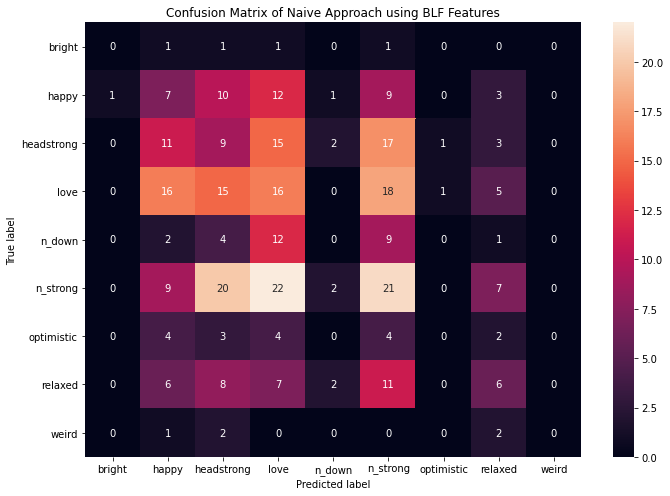

Accuracy = 0.17002881844380405


In [33]:
df_cm = pd.DataFrame(cm, index=['bright', 'happy', 'headstrong', 'love', 'n_down', 'n_strong', 'optimistic', 'relaxed', 'weird'],
                     columns=['bright', 'happy', 'headstrong', 'love', 'n_down', 'n_strong', 'optimistic', 'relaxed', 'weird'])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of Naive Approach using BLF Features')
plt.tight_layout()
plt.show()

print("Accuracy =", accuracy_score(Y_test, knn_predict))

## Pre-processing Ps09

In [34]:
with open('./Features/ps09_features.txt') as f:
    lines = f.readlines()

In [35]:
tcg_cov = []
tcg_m = []
tcg_e = []
tcg_e_approx = []
tcg_dm = []
tcg_ds = []

ocg_cov = []
ocg_m = []
ocg_e = []
ocg_e_approx = []
ocg_dm = []
ocg_ds = []

for line in lines:

    if line.startswith('TCG_COV:'):
        tcg_cov.append(
            list(map(float, line.replace('TCG_COV:', '').rstrip('\n').strip().split(' '))))
    if line.startswith('TCG_M:'):
        tcg_m.append(
            list(map(float, line.replace('TCG_M:', '').rstrip('\n').strip().split(' '))))
    if line.startswith('TCG_E:'):
        tcg_e.append(
            list(map(float, line.replace('TCG_E:', '').rstrip('\n').strip().split(' '))))
    if line.startswith('TCG_E_APPROX:'):
        tcg_e_approx.append(list(map(float, line.replace(
            'TCG_E_APPROX:', '').rstrip('\n').strip().split(' '))))
    if line.startswith('TCG_DM:'):
        tcg_dm.append(
            list(map(float, line.replace('TCG_DM:', '').rstrip('\n').strip().split(' '))))
    if line.startswith('TCG_DS:'):
        tcg_ds.append(
            list(map(float, line.replace('TCG_DS:', '').rstrip('\n').strip().split(' '))))
    if line.startswith('OCG_COV:'):
        ocg_cov.append(
            list(map(float, line.replace('OCG_COV:', '').rstrip('\n').strip().split(' '))))
    if line.startswith('OCG_M:'):
        ocg_m.append(
            list(map(float, line.replace('OCG_M:', '').rstrip('\n').strip().split(' '))))
    if line.startswith('OCG_E:'):
        ocg_e.append(
            list(map(float, line.replace('OCG_E:', '').rstrip('\n').strip().split(' '))))
    if line.startswith('OCG_E_APPROX:'):
        ocg_e_approx.append(list(map(float, line.replace(
            'OCG_E_APPROX:', '').rstrip('\n').strip().split(' '))))
    if line.startswith('OCG_DM:'):
        ocg_dm.append(
            list(map(float, line.replace('OCG_DM:', '').rstrip('\n').strip().split(' '))))
    if line.startswith('OCG_DS:'):
        ocg_ds.append(
            list(map(float, line.replace('OCG_DS:', '').rstrip('\n').strip().split(' '))))

In [36]:
ps09 = pd.DataFrame(
    {'TCG_COV': tcg_cov,
     'TCG_M': tcg_m,
     'TCG_E': tcg_e,
     'TCG_E_APPROX': tcg_e_approx,
     'TCG_DM': tcg_dm,
     'TCG_DS': tcg_ds,
     'OCG_COV': ocg_cov,
     'OCG_M': ocg_m,
     'OCG_E': ocg_e,
     'OCG_E_APPROX': ocg_e_approx,
     'OCG_DM': ocg_dm,
     'OCG_DS': ocg_ds
     })

In [37]:
median_mat_ps09 = ps09.copy()

median_mat_ps09.head(3)
tot_len = len(ps09)

In [38]:
median_mat_ps09['TCG_COV_M'] = np.nan
median_mat_ps09['TCG_M_M'] = np.nan
median_mat_ps09['TCG_E_M'] = np.nan
median_mat_ps09['TCG_E_APPROX_M'] = np.nan
median_mat_ps09['TCG_DM_M'] = np.nan
median_mat_ps09['TCG_DS_M'] = np.nan

median_mat_ps09['OCG_COV_M'] = np.nan
median_mat_ps09['OCG_M_M'] = np.nan
median_mat_ps09['OCG_E_M'] = np.nan
median_mat_ps09['OCG_E_APPROX_M'] = np.nan
median_mat_ps09['OCG_DM_M'] = np.nan
median_mat_ps09['OCG_DS_M'] = np.nan

for i in range(tot_len):
    median_mat_ps09['TCG_COV_M'][i] = np.median(median_mat_ps09['TCG_COV'][i])
    median_mat_ps09['TCG_M_M'][i] = np.median(median_mat_ps09['TCG_M'][i])
    median_mat_ps09['TCG_E_M'][i] = np.median(median_mat_ps09['TCG_E'][i])
    median_mat_ps09['TCG_E_APPROX_M'][i] = np.median(
        median_mat_ps09['TCG_E_APPROX'][i])
    median_mat_ps09['TCG_DM_M'][i] = np.median(median_mat_ps09['TCG_DM'][i])
    median_mat_ps09['TCG_DS_M'][i] = np.median(median_mat_ps09['TCG_DS'][i])

    median_mat_ps09['OCG_COV_M'][i] = np.median(median_mat_ps09['OCG_COV'][i])
    median_mat_ps09['OCG_M_M'][i] = np.median(median_mat_ps09['OCG_M'][i])
    median_mat_ps09['OCG_E_M'][i] = np.median(median_mat_ps09['OCG_E'][i])
    median_mat_ps09['OCG_E_APPROX_M'][i] = np.median(
        median_mat_ps09['OCG_E_APPROX'][i])
    median_mat_ps09['OCG_DM_M'][i] = np.median(median_mat_ps09['OCG_DM'][i])
    median_mat_ps09['OCG_DS_M'][i] = np.median(median_mat_ps09['OCG_DS'][i])

In [39]:
median_mat_ps09.head(4)

,TCG_COV,TCG_M,TCG_E,TCG_E_APPROX,TCG_DM,TCG_DS,OCG_COV,OCG_M,OCG_E,OCG_E_APPROX,...,TCG_E_M,TCG_E_APPROX_M,TCG_DM_M,TCG_DS_M,OCG_COV_M,OCG_M_M,OCG_E_M,OCG_E_APPROX_M,OCG_DM_M,OCG_DS_M
0,"[319.538, -45.8501, 0.267912, -13.6128, -8.548...","[549.483, 21.6684, -42.9428, -10.8609, -24.987...",[97.0395],[104.984],[0.0],[1.0],"[5506.77, -391.741, -290.632, 1133.95, -4683.9...","[1577.75, 66.877, -722.626, -92.0883, -119.625...",[244.658],[289.286],...,97.0395,104.984,0.0,1.0,-26.982700,-6.002495,244.658,289.286,0.0,1.0
1,"[190.943, -116.152, 38.2106, -37.1937, -17.373...","[538.419, 25.3463, -30.3232, -1.69132, -24.829...",[92.1754],[100.661],[0.0],[1.0],"[1174.43, -589.13, -140.333, -51.251, -829.96,...","[1402.57, 34.9043, -712.065, -121.737, 27.0527...",[223.94],[260.011],...,92.1754,100.661,0.0,1.0,2.007195,3.347235,223.940,260.011,0.0,1.0
2,"[325.063, -166.346, 12.6094, -38.9829, 23.3117...","[537.103, 36.4399, -34.4463, -5.76654, -27.841...",[96.6597],[104.246],[0.0],[1.0],"[2927.52, -876.89, -1046.93, -1340.93, -414.91...","[1385.25, 34.7152, -657.183, -71.3458, 13.4824...",[219.249],[253.747],...,96.6597,104.246,0.0,1.0,-17.829400,-0.637084,219.249,253.747,0.0,1.0
3,"[718.013, -166.345, 32.4895, -60.3501, 13.2168...","[499.108, 44.9616, -25.4591, -4.76643, -27.665...",[100.649],[108.027],[0.0],[1.0],"[3968.66, -845.087, 1071.58, 417.387, -2860.47...","[1392.52, 86.663, -610.037, -30.0828, -99.4535...",[232.939],[272.748],...,100.6490,108.027,0.0,1.0,9.807000,-1.001265,232.939,272.748,0.0,1.0


In [40]:
feature_vector_PS09 = median_mat_ps09.drop(['TCG_COV', 'TCG_M', 'TCG_E', 'TCG_E_APPROX', 'TCG_DM', 'TCG_DS',
                                            'OCG_COV', 'OCG_M', 'OCG_E', 'OCG_E_APPROX', 'OCG_DM', 'OCG_DS'], axis=1)

In [41]:
fps09 = pd.read_csv('./Features/ps09_similarities.txt', sep='\t', nrows=1355)
fps09 = fps09.drop(fps09.columns[0], axis=1)
fps09.columns = ['SONG_ID']


In [42]:
fps09withID = fps09.join(feature_vector_PS09)


In [43]:
ps09_songs_chosen_train = fps09withID[fps09withID.SONG_ID.isin(songs_moods)]


In [44]:
ps09_training_set_naive = ps09_songs_chosen_train.merge(
    moods_train, on='SONG_ID')


In [45]:
ps09_blf = ps09_training_set_naive.drop(['MOODS'], axis=1)


## BLF + PS09 Train Set

In [46]:
ps09_blf_train = blf_training_set_naive.merge(ps09_blf, on='SONG_ID')
ps09_blf_train

,SONG_ID,SPECTRAL_M,DELTASPECTRAL_M,VARIANCEDELTASPECTRAL_M,LOGARITHMICFLUCTUATION_M,CORRELATION_M,SPECTRALCONTRAST_M,MOODS,MOODS_ENC,TCG_COV_M,...,TCG_E_M,TCG_E_APPROX_M,TCG_DM_M,TCG_DS_M,OCG_COV_M,OCG_M_M,OCG_E_M,OCG_E_APPROX_M,OCG_DM_M,OCG_DS_M
0,1000226,0.007710,0.003423,0.002648,219.0230,0.000040,0.025420,n_strong,5,-0.006477,...,92.1754,100.6610,0.0,1.0,2.007195,3.347235,223.940,260.011,0.0,1.0
1,1001319,0.008604,0.003692,0.002757,231.1085,0.000050,0.027456,n_strong,5,-0.050893,...,96.6597,104.2460,0.0,1.0,-17.829400,-0.637084,219.249,253.747,0.0,1.0
2,37580,0.009157,0.003501,0.003110,257.2710,0.000165,0.029707,headstrong,2,0.198145,...,100.6490,108.0270,0.0,1.0,9.807000,-1.001265,232.939,272.748,0.0,1.0
3,376917,0.010370,0.003959,0.003068,298.5275,0.000157,0.027073,n_strong,5,0.043467,...,103.1790,110.0800,0.0,1.0,-7.228775,-0.049625,233.911,272.076,0.0,1.0
4,1001325,0.007384,0.003321,0.002212,200.4800,0.000020,0.023999,relaxed,7,-0.041742,...,86.1130,92.3184,0.0,1.0,3.156635,5.829050,223.838,264.590,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,375083,0.011672,0.004960,0.003522,365.1475,0.000303,0.025870,n_down,4,0.237441,...,110.5280,119.1510,0.0,1.0,4.232020,-3.974845,242.278,288.617,0.0,1.0
900,993066,0.010659,0.005519,0.003556,388.8205,0.000267,0.027796,n_strong,5,0.075809,...,109.3700,116.5400,0.0,1.0,3.919530,-2.719980,241.029,278.696,0.0,1.0
901,375268,0.009386,0.004518,0.002567,278.2145,0.000185,0.024311,happy,1,0.087187,...,101.6000,110.4240,0.0,1.0,-8.651620,-4.312160,236.414,284.694,0.0,1.0
902,993088,0.008083,0.003562,0.002839,222.9525,0.000064,0.027412,n_strong,5,0.039481,...,96.2277,104.4460,0.0,1.0,-16.474000,3.647035,221.737,258.025,0.0,1.0


## BLF + PS09 Test Set

In [47]:
ps09_songs_chosen_test = fps09withID[fps09withID.SONG_ID.isin(songs_moods_test)]
ps09_songs_chosen_test.head()

,SONG_ID,TCG_COV_M,TCG_M_M,TCG_E_M,TCG_E_APPROX_M,TCG_DM_M,TCG_DS_M,OCG_COV_M,OCG_M_M,OCG_E_M,OCG_E_APPROX_M,OCG_DM_M,OCG_DS_M
0,375706,0.173011,-1.000643,97.0395,104.984,0.0,1.0,-26.982700,-6.002495,244.658,289.286,0.0,1.0
4,37586,-0.004340,-0.590726,95.6184,103.732,0.0,1.0,-11.284300,-2.464580,222.491,255.909,0.0,1.0
6,1001321,0.017042,-0.112752,108.6550,117.924,0.0,1.0,15.308150,-5.775602,239.756,283.837,0.0,1.0
13,1004185,0.478837,-1.058452,105.6560,115.390,0.0,1.0,-8.192185,-11.679240,240.790,286.268,0.0,1.0
14,380203,0.349147,-0.551659,112.4250,122.243,0.0,1.0,-8.282225,-0.063389,240.673,279.739,0.0,1.0


In [48]:
ps09_testing_set_naive = ps09_songs_chosen_test.merge(mood_test, on='SONG_ID')

In [49]:
ps09_blf_test = ps09_testing_set_naive.drop(['MOODS'], axis=1)

In [50]:
ps09_blf_test = blf_training_set_naive_test.merge(ps09_blf_test, on='SONG_ID')
#ps09_blf_test.head()

## MODELS

## KNN

In [51]:
X_test_both = ps09_blf_test.drop(
    ['SONG_ID', 'MOODS', 'MOODS_ENC'], axis=1).to_numpy()
Y_test_both = ps09_blf_test['MOODS_ENC']

In [52]:
features_both = ps09_blf_train.drop(
    ['SONG_ID', 'MOODS', 'MOODS_ENC'], axis=1).to_numpy()
labels_both = ps09_blf_train['MOODS_ENC']

In [53]:
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the model using the training sets
knn_model.fit(features_both, labels_both)

KNeighborsClassifier()

In [54]:
knn_predict = knn_model.predict(X_test_both)

In [55]:
accuracy_score(Y_test_both, knn_predict)

0.15561959654178675

In [56]:
cm = confusion_matrix(Y_test_both, knn_predict)

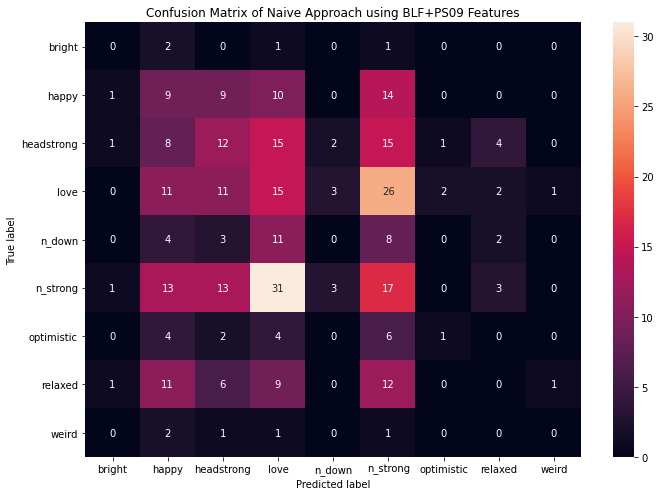

Accuracy = 0.15561959654178675


In [57]:
df_cm = pd.DataFrame(cm, index=['bright', 'happy', 'headstrong', 'love', 'n_down', 'n_strong', 'optimistic', 'relaxed', 'weird'],
                     columns=['bright', 'happy', 'headstrong', 'love', 'n_down', 'n_strong', 'optimistic', 'relaxed', 'weird'])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of Naive Approach using BLF+PS09 Features')
plt.tight_layout()
plt.show()

print("Accuracy =", accuracy_score(Y_test_both, knn_predict))

### Checking the correct and incorrect classification (analysis of the results)

In [58]:
song_id = ps09_blf_test['SONG_ID']
d = {'True': Y_test_both, 'Predicted':knn_predict}
check = pd.DataFrame(d)
check = check.join(song_id)
check.head()

,True,Predicted,SONG_ID
0,5,3,375706
1,7,5,37586
2,7,1,1001321
3,7,3,1004185
4,3,5,380203


# only ps09

In [59]:
X_test_ps09 = ps09_blf_test.drop(['SONG_ID', 'SPECTRAL_M', 'DELTASPECTRAL_M', 'VARIANCEDELTASPECTRAL_M',
                                  'LOGARITHMICFLUCTUATION_M', 'CORRELATION_M', 'SPECTRALCONTRAST_M',
                                  'MOODS', 'MOODS_ENC'], axis=1).to_numpy()
X_train_ps09 = ps09_blf_train.drop(['SONG_ID', 'SPECTRAL_M', 'DELTASPECTRAL_M', 'VARIANCEDELTASPECTRAL_M',
                                    'LOGARITHMICFLUCTUATION_M', 'CORRELATION_M', 'SPECTRALCONTRAST_M',
                                    'MOODS', 'MOODS_ENC'], axis=1).to_numpy()
y_test_ps09 = ps09_blf_test['MOODS_ENC']
y_train_ps09 = ps09_blf_train['MOODS_ENC']

In [60]:
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the model using the training sets
knn_model.fit(X_train_ps09, y_train_ps09)

KNeighborsClassifier()

In [61]:
knn_predict = knn_model.predict(X_test_ps09)

In [62]:
accuracy_score(y_test_ps09, knn_predict)

0.16138328530259366

In [63]:
cm = confusion_matrix(y_test_ps09, knn_predict)

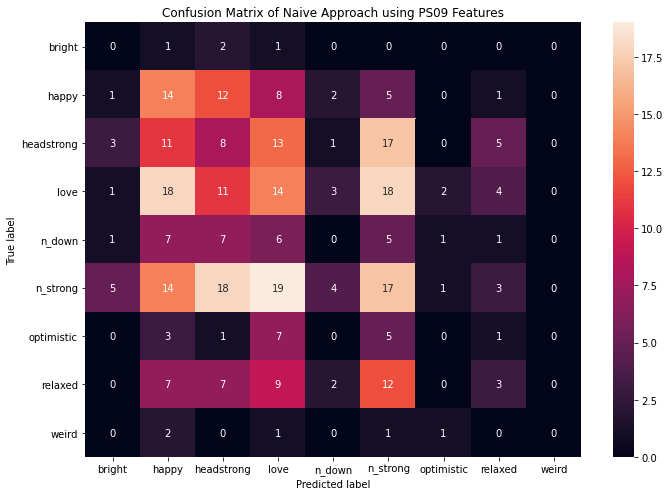

Accuracy = 0.16138328530259366


In [64]:
df_cm = pd.DataFrame(cm, index=['bright', 'happy', 'headstrong', 'love', 'n_down', 'n_strong', 'optimistic', 'relaxed', 'weird'],
                     columns=['bright', 'happy', 'headstrong', 'love', 'n_down', 'n_strong', 'optimistic', 'relaxed', 'weird'])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of Naive Approach using PS09 Features')
plt.tight_layout()
plt.show()

print("Accuracy =", accuracy_score(y_test_ps09, knn_predict))